In [15]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [36]:
def plot_scatter(data_A, data_B, x_axis, label_A, label_B):

    x = x_axis
    a = data_A
    b = data_B

    fig, ax = plt.subplots()
    ax.scatter(x, a, color = "r", label = label_A)
    ax.scatter(x, b, color = "b", label = label_B)
    
    plt.show()

In [27]:
def plot_histogram(data_A, data_B, x_axis, label_A, label_B):

    x = x_axis
    a = data_A
    b = data_B

    fig, ax = plt.subplots()
    ax.hist(x, a, color = "b", label = label_A)
    ax.hist(x, b, color = "r", label = label_B)
    
    plt.show()

Exercise 1

In [82]:
def points_distribution(points_n, dimensions_n, radius):
    
    points = [[np.random.uniform(-1, 1) for i in range(dimensions_n)] for j in range(points_n)]
    center_point = np.zeros(dimensions_n)
    
    in_ball = [points[i] for i in range(points_n) if (np.linalg.norm(points[i] - center_point) <= radius)]
    
    not_in_ball = [points[i] for i in range(points_n) if (np.linalg.norm(points[i] - center_point) > radius)]
    
    in_ball_percent = 100 * len(list(in_ball)) / points_n
    not_in_ball_percent = 100 * len(list(not_in_ball)) / points_n
    return in_ball_percent, not_in_ball_percent

In [84]:
points_distribution(100, 4, 1)

in_b, not_in_b = points_distribution(100, 4, 1)
print("Points in ball: " + str(in_b) + " %, Points not in ball: " + str(not_in_b) + " %")

Points in ball: 27.0 %, Points not in ball: 73.0 %


Create a plot

In [14]:
def points_distribution_plot(samples_n):
    in_ball = []
    out_ball = []
    dimension = []
    d = 2
    for i in range(samples_n):
        p = 1000
        d += 1
        d_actual = (d % 10) + 1
        in_b, out_b = points_distribution(p, d_actual, 1)
        in_ball.append(in_b)
        out_ball.append(out_b)
        dimension.append(d_actual)
    return in_ball, out_ball, dimension

In [40]:
in_ball, out_ball, dim = points_distribution_plot(500)

In [ ]:
print(in_ball)
print("\n\n")
print(out_ball)

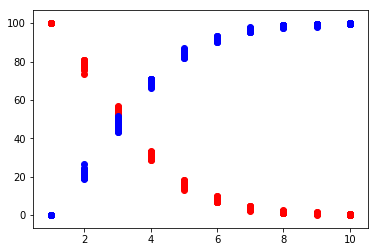

In [86]:
plot_scatter(in_ball, out_ball, dim, "In", "Out")

Exercise 2

In [17]:
def create_hypercube(points_n, dimensions_n):
    points = [[np.random.uniform(-1, 1) for i in range(dimensions_n)] for j in range(points_n)]
    return points

In [18]:
def mean_and_std_distance_hypercube(points_n, dimensions_n, samples_n):
    points = create_hypercube(points_n, dimensions_n)
    sampled_points = np.array(random.sample(points, samples_n))
    distances = []
    
    for i in range(samples_n):
        for j in range(i + 1, samples_n):
            distance = np.linalg.norm(sampled_points[i] - sampled_points[j])
            distances.append(distance)
    
    return np.mean(distances), np.std(distances)

In [19]:
print(mean_and_std_distance_hypercube(1000, 5, 250))

(1.7561932810675225, 0.4905034086126409)


In [32]:
def mean_and_std_plot(samples_n):
    mean = []
    std = []
    dimension = []
    d = 2
    
    for d in range(1, 10):
        for i in range(samples_n):
            p = 1000
            m, s = mean_and_std_distance_hypercube(1000, d, 400)
            mean.append(m)
            std.append(s)
            dimension.append(d) 
        
            
#         d += 1
#         d_actual = (d % 10) + 1
#         m, s = mean_and_std_distance_hypercube(1000, d_actual, 400)
#         mean.append(m)
#         std.append(s)
#         dimension.append(d_actual)
        
    return mean, std, dimension

In [ ]:
mean, std, dim = mean_and_std_plot(10)
# print(mean)
# print("\n\n")
# print(std)
# print("\n\n")
# print(dim)

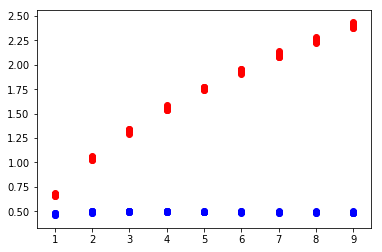

In [37]:
plot_scatter(mean, std, dim, "Mean", "std")